# k Nearest Neighbours kNN

In [1]:
import pandas as pd

In [40]:
paris_listings = pd.read_csv('paris_airbnb.csv')

In [3]:
paris_listings.loc[1]

host_response_rate                 100%
host_acceptance_rate                NaN
host_listings_count                 1.0
latitude                         48.851
longitude                       2.35869
city                              Paris
zipcode                           75004
state                     Ile-de-France
accommodates                          2
room_type               Entire home/apt
bedrooms                            0.0
bathrooms                           1.0
beds                                1.0
price                           $115.00
cleaning_fee                     $36.00
security_deposit                  $0.00
minimum_nights                        1
maximum_nights                       90
number_of_reviews                   173
Name: 1, dtype: object

In [4]:
paris_listings.head(1)

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,city,zipcode,state,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews
0,100%,NaN,1.0,48.83349,2.31852,Paris,75014,Île-de-France,2,Entire home/apt,0.0,1.0,0.0,$75.00,$50.00,$0.00,3,15,8


In [5]:
import numpy as np

In [6]:
 our_accomadates_value = 3

In [11]:
first_living_space_value = paris_listings.iloc[0]['accommodates']

In [14]:
first_distance = np.abs(first_living_space_value - our_accomadates_value)

In [15]:
first_distance

1

In [19]:
paris_listings['distance'] = paris_listings['accommodates'].apply(lambda x: np.abs(x - our_accomadates_value))

In [20]:
paris_listings['distance'].value_counts()

1     5665
0      878
2      726
3      508
4       88
5       82
6       18
7       14
9        8
11       4
8        4
13       3
10       2
Name: distance, dtype: int64

In [21]:
np.random.seed(1)

In [23]:
order = np.random.permutation(len(paris_listings))

In [24]:
paris_listings = paris_listings.loc[order]

In [26]:
paris_listings = paris_listings.sort_values('distance')

In [27]:
paris_listings.iloc[0:10].price

1956     $80.00
3735     $67.00
6944     $36.00
2094    $120.00
2968     $60.00
845     $200.00
6083     $95.00
5970     $95.00
2992     $76.00
3179    $100.00
Name: price, dtype: object

In [30]:
paris_listings['price'] = paris_listings['price'].str.replace(',', '', regex=False)
paris_listings['price'] = paris_listings['price'].str.replace('$', '', regex=False)

In [31]:
paris_listings.iloc[0:10].price

1956     80.00
3735     67.00
6944     36.00
2094    120.00
2968     60.00
845     200.00
6083     95.00
5970     95.00
2992     76.00
3179    100.00
Name: price, dtype: object

In [34]:
paris_listings['price'] = paris_listings['price'].astype('float')

In [35]:
paris_listings['price'].dtype

dtype('float64')

In [38]:
mean_price = paris_listings.iloc[0:5]['price'].mean()

In [39]:
mean_price

72.6

# Entrainement d'un modèle

In [68]:
import pandas as pd
import numpy as np
np.random.seed(1)

paris_listings = pd.read_csv('paris_airbnb.csv')
stripped_comas = paris_listings['price'].str.replace(',', '', regex=False)
stripped_dollars = stripped_comas.str.replace('$', '', regex=False)
paris_listings['price'] = stripped_dollars.astype('float')
paris_listings = paris_listings.loc[np.random.permutation(len(paris_listings))]

train_df = paris_listings.iloc[0:6000].copy()
test_df = paris_listings.iloc[6000:].copy()

def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    predicted_price = temp_df.iloc[0:5]['price'].mean()
    return predicted_price

test_df['predicted_price'] = test_df['accommodates'].apply(lambda x: predict_price(x))

In [69]:
test_df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,city,zipcode,state,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,predicted_price
4465,96%,NaN,28.0,48.89318,2.31884,Paris,75017,Paris province,2,Entire home/apt,0.0,1.0,1.0,63.0,$100.00,$400.00,14,180,61,90.4
3154,100%,NaN,2.0,48.85114,2.29728,Paris,75015,Île-de-France,5,Entire home/apt,1.0,1.0,4.0,120.0,$50.00,$200.00,1,120,102,176.8
1969,65%,NaN,93.0,48.85134,2.33359,Paris,75006,Île-de-France,3,Entire home/apt,1.0,1.0,2.0,149.0,$60.00,$600.00,30,1125,5,96.2
2713,NaN,NaN,1.0,48.87320,2.38649,Paris,75020,Île-de-France,4,Entire home/apt,2.0,1.0,1.0,79.0,$65.00,$299.00,2,1125,5,173.0
5578,100%,NaN,1.0,48.85691,2.36013,Paris,75004,Île-de-France,2,Entire home/apt,1.0,1.0,1.0,51.0,$25.00,$150.00,4,15,17,90.4


In [70]:
test_df['error'] = np.absolute(test_df['predicted_price'] - test_df['price'])
mae = test_df['error'].mean()
mae

52.562200000000004

In [71]:
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**2
mse =  test_df['squared_error'].mean()
mse

6724.726040000001

In [73]:
rmse = np.sqrt(mse)
rmse

82.00442695367124

# Entrainement d'un autre modèle

In [74]:
def predict_price_2(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bedrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    predicted_price = temp_df.iloc[0:5]['price'].mean()
    return predicted_price

In [75]:
test_df['predicted_price'] = test_df['bedrooms'].apply(lambda x: predict_price_2(x))

In [76]:
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**2
mse =  test_df['squared_error'].mean()
mse

6281.181979999999

In [79]:
rmse = np.sqrt(mse)

In [80]:
rmse

79.25390829479642

# Modèle multivarié

In [147]:
import pandas as pd
import numpy as np
np.random.seed(1)
paris_listings = pd.read_csv('paris_airbnb.csv')
stripped_comas = paris_listings['price'].str.replace(',', '', regex=False)
stripped_dollars = stripped_comas.str.replace('$', '', regex=False)
paris_listings['price'] = stripped_dollars.astype('float')
paris_listings = paris_listings.loc[np.random.permutation(len(paris_listings))]

In [148]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4740 to 5157
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    5000 non-null   object 
 1   host_acceptance_rate  0 non-null      float64
 2   host_listings_count   7999 non-null   float64
 3   latitude              8000 non-null   float64
 4   longitude             8000 non-null   float64
 5   city                  7997 non-null   object 
 6   zipcode               7930 non-null   object 
 7   state                 7977 non-null   object 
 8   accommodates          8000 non-null   int64  
 9   room_type             8000 non-null   object 
 10  bedrooms              7976 non-null   float64
 11  bathrooms             7942 non-null   float64
 12  beds                  7986 non-null   float64
 13  price                 8000 non-null   float64
 14  cleaning_fee          6250 non-null   object 
 15  security_deposit  

### Suppression des colonnes qui ne seront pas utiles

-> Colonnes ne contenant pas de données numériques  
-> Colonnes ne contenant pas de données ordinales  
-> Colonnes n'ayant pas de lien avec l'appartement en lui même  

In [149]:
paris_listings=paris_listings.drop(columns=[
    'room_type',
    'city',
    'state',
    'latitude',
    'longitude',
    'zipcode',
    'host_response_rate',
    'host_acceptance_rate',
    'host_listings_count'
])

In [150]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4740 to 5157
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       8000 non-null   int64  
 1   bedrooms           7976 non-null   float64
 2   bathrooms          7942 non-null   float64
 3   beds               7986 non-null   float64
 4   price              8000 non-null   float64
 5   cleaning_fee       6250 non-null   object 
 6   security_deposit   6320 non-null   object 
 7   minimum_nights     8000 non-null   int64  
 8   maximum_nights     8000 non-null   int64  
 9   number_of_reviews  8000 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 687.5+ KB


### Suppression des valeurs manquantes

In [151]:
paris_listings.isnull().sum()

accommodates            0
bedrooms               24
bathrooms              58
beds                   14
price                   0
cleaning_fee         1750
security_deposit     1680
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64

In [152]:
paris_listings=paris_listings.drop(['cleaning_fee', 'security_deposit'], axis=1)

In [153]:
paris_listings

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
4740,4,1.0,1.0,2.0,65.0,2,1125,6
5606,3,2.0,1.5,2.0,98.0,5,1124,1
4824,2,0.0,1.0,1.0,65.0,10,1125,0
4205,2,1.0,1.0,1.0,45.0,5,1125,83
3228,3,1.0,1.0,2.0,65.0,5,365,5
...,...,...,...,...,...,...,...,...
7935,4,1.0,1.0,2.0,72.0,7,7,0
5192,2,0.0,1.0,1.0,49.0,30,1125,2
3980,2,0.0,1.0,1.0,99.0,2,1125,2
235,6,2.0,1.0,4.0,230.0,2,25,98


In [154]:
paris_listings=paris_listings.dropna(axis=0)

In [155]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7917 entries, 4740 to 5157
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       7917 non-null   int64  
 1   bedrooms           7917 non-null   float64
 2   bathrooms          7917 non-null   float64
 3   beds               7917 non-null   float64
 4   price              7917 non-null   float64
 5   minimum_nights     7917 non-null   int64  
 6   maximum_nights     7917 non-null   int64  
 7   number_of_reviews  7917 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 556.7 KB


In [156]:
paris_listings.isnull().sum()

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

### Normalisation des colonnes

In [157]:
paris_listings.head(6)

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
4740,4,1.0,1.0,2.0,65.0,2,1125,6
5606,3,2.0,1.5,2.0,98.0,5,1124,1
4824,2,0.0,1.0,1.0,65.0,10,1125,0
4205,2,1.0,1.0,1.0,45.0,5,1125,83
3228,3,1.0,1.0,2.0,65.0,5,365,5
2745,4,1.0,1.0,2.0,88.0,3,30,120


In [158]:
# Soustraire la moyenne à chaque valeur de la colonne
first_transformation = paris_listings['maximum_nights'] - paris_listings['maximum_nights'].mean()

#Diviser par l'écart type pour normaliser les valeurs de la colonne
normalized_col = first_transformation/first_transformation.std()

###### Pour toutes les colonnes

In [159]:
normalized_listings = (paris_listings - paris_listings.mean())/paris_listings.std()

In [160]:
normalized_listings

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
4740,0.503868,-0.296884,-0.293537,0.20531,-0.439998,-0.184601,1.062858,-0.564545
5606,-0.131849,0.892605,0.843973,0.20531,-0.145570,-0.101183,1.061018,-0.636924
4824,-0.767566,-1.486372,-0.293537,-0.64526,-0.439998,0.037847,1.062858,-0.651400
4205,-0.767566,-0.296884,-0.293537,-0.64526,-0.618440,-0.101183,1.062858,0.550105
3228,-0.131849,-0.296884,-0.293537,0.20531,-0.439998,-0.101183,-0.335685,-0.579021
...,...,...,...,...,...,...,...,...
7935,0.503868,-0.296884,-0.293537,0.20531,-0.377544,-0.045571,-0.994472,-0.651400
5192,-0.767566,-1.486372,-0.293537,-0.64526,-0.582752,0.593969,1.062858,-0.622448
3980,-0.767566,-1.486372,-0.293537,-0.64526,-0.136648,-0.184601,1.062858,-0.622448
235,1.775303,0.892605,-0.293537,1.90645,1.032146,-0.184601,-0.961349,0.767245


In [161]:
normalized_listings.price = paris_listings.price

In [162]:
normalized_listings.head(3)

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
4740,0.503868,-0.296884,-0.293537,0.20531,65.0,-0.184601,1.062858,-0.564545
5606,-0.131849,0.892605,0.843973,0.20531,98.0,-0.101183,1.061018,-0.636924
4824,-0.767566,-1.486372,-0.293537,-0.64526,65.0,0.037847,1.062858,-0.651400


# Distance euclidienne pour le cas multivarié

In [163]:
from scipy.spatial import distance
first_listings = [0.503868, -0.296884]
second_listing = [-0.131849, 0.892605]

dist = distance.euclidean(first_listings, second_listing)
dist

1.3487105639128063

In [164]:
first_fifth_distance = distance.euclidean(
    normalized_listings.iloc[0][['accommodates', 'bedrooms']],
    normalized_listings.iloc[4][['accommodates', 'bedrooms']]
)
first_fifth_distance

0.6357172321498354

# Scikit-learn 

- Instancier le modèle de Machine Learning qu'on souhaite utiliser 
- Adapter le modèle aux données d'entrainement
- Utiliser le modèle pour faire des prédictions
- Evaluer la précision du modèle

### classe KNeighborsRegressor

In [165]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

### Adapter le modèle

Méthode fit() prend 2 paramètres obligatoires :

- Un objet matrice contenant les caractéristiques du set de training
- Un objet liste contenant la colonne cible

In [166]:
# Train-Test-Split
train_df = normalized_listings.iloc[0:6000]
test_df = normalized_listings.iloc[6000:]

# Matrice contenant seulement les colonnes du training-set
train_features = train_df[['accommodates', 'bedrooms']]

# Liste contenant colonne cible
train_target = train_df['price']

# Fit the data
knn.fit(train_features, train_target)

KNeighborsRegressor(algorithm='brute')

### Prédictions

Méthode predict() prend un seul paramètre obligatoire : 
- Un objet matrice contenant les caractéritiques du set de test

In [167]:
test_features = test_df[['accommodates', 'bedrooms']]
predictions = knn.predict(test_features)

In [168]:
predictions

array([ 64.,  94.,  94., ...,  64., 141.,  94.])

### Calcul du RMSE

In [169]:
from sklearn.metrics import mean_squared_error

two_features_mse = mean_squared_error(test_df['price'], predictions)
two_features_rmse = np.sqrt(two_features_mse)

print(two_features_mse)
print(two_features_rmse)

7470.376838810641
86.43134176217931


### Utiliser plus de caractéristiques

In [172]:
knn_4 = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
train_columns = ['accommodates', 'bedrooms', 'bathrooms', 'beds']
knn_4.fit(train_df[train_columns], train_df['price'])
predictions_4 = knn_4.predict(test_df[train_columns])
four_features_mse = mean_squared_error(test_df['price'], predictions_4)
four_features_rmse = np.sqrt(four_features_mse)

print(four_features_mse)
print(four_features_rmse)

5436.579071465832
73.73316127405519


# Optimisation des hyper paramètres

In [173]:
train_df = pd.read_csv('paris_airbnb_train.csv')
test_df = pd.read_csv('paris_airbnb_test.csv')

#### Grid search

In [202]:
hyper_params = list()
for i in range(10,200):
    hyper_params.append(i)
mse_values = []

for param in hyper_params: 
    knn = KNeighborsRegressor(n_neighbors=param, algorithm='brute')
    features = ['accommodates', 'bedrooms', 'bathrooms', 'beds', 'number_of_reviews']
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

In [203]:
min(mse_values)

4940.3070441944965

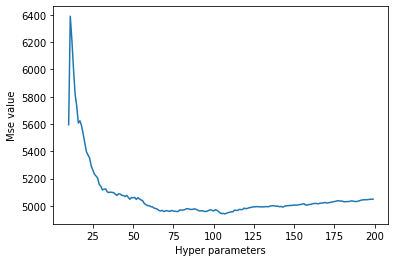

In [204]:
from matplotlib import pyplot as plt

plt.plot(hyper_params, mse_values)
plt.xlabel('Hyper parameters')
plt.ylabel('Mse value')
plt.show()

# Validation croisée

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
np.random.seed(1)

paris_listings = pd.read_csv('paris_airbnb.csv')
stripped_comas = paris_listings['price'].str.replace(',', '', regex=False)
stripped_dollars = stripped_comas.str.replace('$', '', regex=False)
paris_listings['price'] = stripped_dollars.astype('float')

shuffled_index = np.random.permutation(paris_listings.index)
paris_listings = paris_listings.reindex(shuffled_index)

split_one = paris_listings.iloc[0:4000]
split_two = paris_listings.iloc[4000:]

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn1 = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
features = ['accommodates']
knn1.fit(split_one[features], split_one['price'])
predictions1 = knn.predict(split_two[features])
mse1 = mean_squared_error(split_two['price'], predictions1)
rmse1 = np.sqrt(mse1)
print(rmse1)

knn2 = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
features = ['accommodates']
knn1.fit(split_two[features], split_two['price'])
predictions2 = knn.predict(split_one[features])
mse2 = mean_squared_error(split_one['price'], predictions2)
rmse2 = np.sqrt(mse2)
print(rmse2)

94.39434283896466
121.86237516149109


In [6]:
average = np.mean([rmse1, rmse2])
print(average)

108.12835900022787


# K fold cross validation

In [7]:
paris_listings['fold'] = 0
paris_listings['fold'].iloc[0:1600] = 1
paris_listings['fold'].iloc[1600:3200] = 2
paris_listings['fold'].iloc[3200:4800] = 3
paris_listings['fold'].iloc[4800:6400] = 4
paris_listings['fold'].iloc[6400:] = 5

In [8]:
knn_fold_1 = KNeighborsRegressor(algorithm='auto')
training_set = paris_listings.loc[paris_listings['fold'] != 1]
test_set = paris_listings.loc[paris_listings['fold'] == 1]

features = ['accommodates']
knn_fold_1.fit(training_set[features], training_set['price'])
labels = knn_fold_1.predict(test_set[features])
mse_label_1 = mean_squared_error(test_set['price'], labels)
iteration_one_rmse = np.sqrt(mse_label_1)
print(iteration_one_rmse)

93.94697400661717


In [9]:
fold_ids = [1, 2, 3, 4, 5]

def train_and_validate(df, folds):
    fold_rmses = []
    for fold in folds:
        #entrainement
        model = KNeighborsRegressor()
        train = df[df['fold'] != fold]
        test = df[df['fold'] == fold]
        model.fit(train[['accommodates']], train['price'])
        
        #prédiction
        labels = model.predict(test[['accommodates']])
        test['predicted_price'] = labels
        mse = mean_squared_error(test['price'], test['predicted_price'])
        rmse = mse**(1/2)
        fold_rmses.append(rmse)
    return(fold_rmses)

rmses = train_and_validate(paris_listings, fold_ids)
print(rmses)

avg_rmse = np.mean(rmses)
print(avg_rmse)

[93.94697400661717, 163.3439872630762, 83.02118133344045, 100.72756176935884, 77.80237319645205]
103.76841551378894


# K fold cross validation with scikit learn

In [21]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=30, shuffle=True, random_state=1)

In [22]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor()
mses = cross_val_score(knn, paris_listings[['accommodates']], paris_listings['price'], scoring='neg_mean_squared_error', cv=kf)
rmses = np.sqrt(np.abs(mses))
avg_rmse = np.mean(rmses)
print(rmses)
print(avg_rmse)

[ 78.42913737  92.75762868  70.48543505  88.58582499  75.38608839
  63.88609128 114.81356717  68.62849344  84.17091405  61.39915455
  67.72724544  96.39514184  67.31598582 113.26051174 101.4647807
  79.68983037  94.10582536 100.48341134  57.98558519  86.736162
 137.76367364  70.4865998   92.01880243  84.62474087  61.20808586
 113.54789854 126.1441126   96.04454167  80.34972243 317.65388669]
94.78496264346678
